# Studio: Using Linear Regression to Predict Stock Prices

Many investors want to know how to predict stock prices. If we could predict the price of a share, we could know when the sell and when to buy and make quite a lot of money in the process. For this studio, you work for a small investing firm who wants you to see if you can use linear regression to predict the prices of MasterCard stock based on historical stock price data.

The dataset came from [Kaggle](https://www.kaggle.com/kalilurrahman/mastercard-stock-data-latest-and-updated) and the CSV is included with this notebook.

## Getting Started

We have imported some of the libraries you need and set up the dataframe for you. Before writing any code, read through the code cell below. We added a column to the dataframe called `'Converted Date'`. If you look at the output of using `.head()`, you will notice that the converted date is large numbers that don't seem to reflect what we know is a date. We set up this column for you to use your linear regression later because the linear regression model struggles to work with `datetime` values. 

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime as dt

import warnings
warnings.filterwarnings('ignore')


stocks_df = pd.read_csv("Mastercard_stock_history.csv")
stocks_df['Year'] = pd.to_numeric(stocks_df['Date'].str[:4])
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df['Converted Date'] = stocks_df['Date'].map(dt.datetime.toordinal)

In [108]:
stocks_df.shape

(3872, 10)

In [109]:
stocks_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Converted Date
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.00,0.0,2006,732456
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.00,0.0,2006,732457
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.00,0.0,2006,732461
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.00,0.0,2006,732462
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.00,0.0,2006,732463
...,...,...,...,...,...,...,...,...,...,...
3867,2021-10-05,347.121403,348.130138,342.497241,342.776886,4724100,0.00,0.0,2021,738068
3868,2021-10-06,339.580960,348.439763,338.682072,348.250000,3712000,0.00,0.0,2021,738069
3869,2021-10-07,349.000000,357.899994,349.000000,353.910004,3209200,0.44,0.0,2021,738070
3870,2021-10-08,356.000000,360.369995,354.209991,354.959991,2336700,0.00,0.0,2021,738071


In [110]:
stocks_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Converted Date
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583,2013.583936,735265.486054
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706,4.454620,1622.149194
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000,2006.000000,732456.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000,2010.000000,733861.750000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000,2014.000000,735267.500000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000,2017.000000,736668.250000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000,2021.000000,738074.000000


## Look at Correlations

Use both `pairplot()` and `heatmap()` to see if there are any correlations between the variables. You can use whatever variables you would like but when creating your pairplot, remember that the business issue we are trying to tackle is the prediction of stock prices.

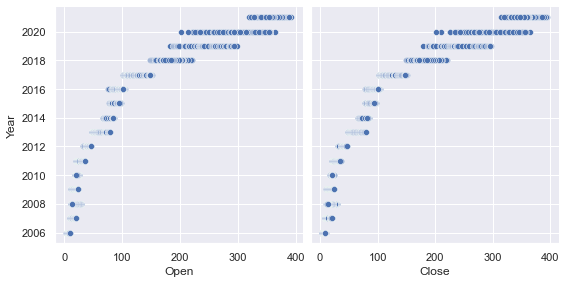

In [111]:
# Using pairplot to visualize the data for correlation
sb.pairplot(stocks_df, x_vars=['Open','Close'], 
             y_vars='Year', size=4, aspect=1, kind='scatter')
plt.show()

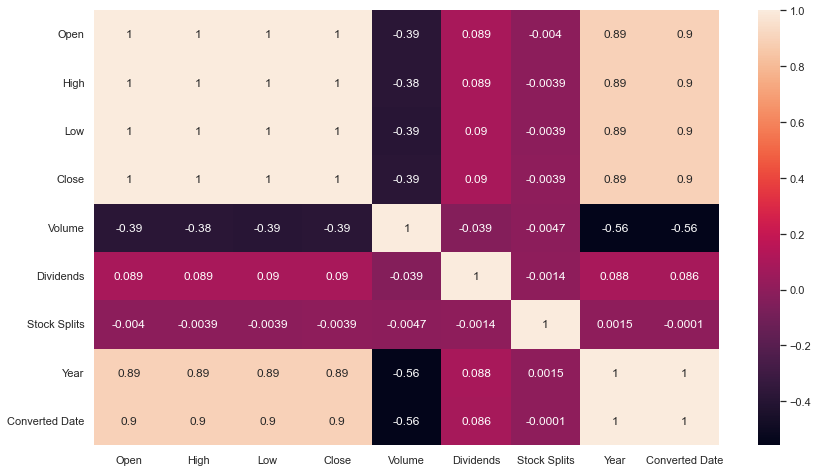

In [112]:
sb.heatmap(stocks_df.corr(),annot = True)

plt.show()

## Build Your Model

Now you are ready to build your model. First, assign your x- and y-variables.

In [113]:
x = stocks_df['Year']
y = stocks_df['Open']

Use the code cells below to create your testing and training sets and output two of your sets to ensure that everything is working.

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [115]:
X_train


2457    2016
1540    2012
384     2007
2560    2016
3320    2019
        ... 
1930    2014
79      2006
1859    2013
2840    2017
1544    2012
Name: Year, Length: 2710, dtype: int64

In [116]:
y_train

2457     84.777597
1540     41.789692
384      18.706097
2560     90.718854
3320    257.031441
           ...    
1930     75.228260
79        6.115560
1859     64.653030
2840    129.994696
1544     39.422718
Name: Open, Length: 2710, dtype: float64

In [117]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const   -43251.715623
Year        21.532407
dtype: float64

With your training and testing sets ready to go, create your linear regression model. Use `summary()` to see how the model went.

In [118]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Open   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                 1.099e+04
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:45:04   Log-Likelihood:                -14329.
No. Observations:                2710   AIC:                         2.866e+04
Df Residuals:                    2708   BIC:                         2.867e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.325e+04    413.564   -104.583      0.000   -4.41e+04   -4.24e+04
Year          21.5324      0.205    104.842      0.000      21.130      21.935
==============================================================================
Omnibus:                      288.311   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.166
Skew:                           0.513   Prob(JB):                     1.68e-40
Kurtosis:                       2.247   Cond. No.                     9.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Create a plot that shows your training sets and the linear regression line. Remember to use the values outputted above by `summary()` to make the line.

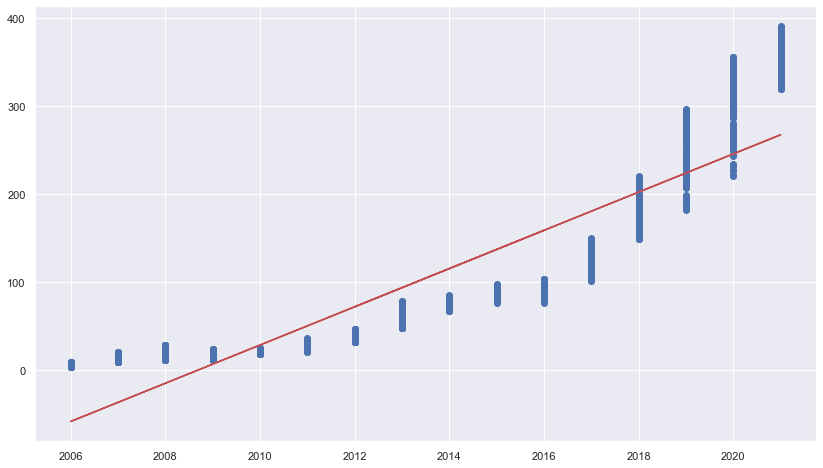

In [119]:
plt.scatter(X_train, y_train)
plt.plot(X_train, -43643.067256 + 21.7273*X_train, 'r')
plt.show()


## Error Terms

With your model built, time to look at the error terms. Use the code cell below to create the residuals with the predicted y-variable and the y training set.

In [120]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

Now plot the residuals. Did you get a bell curve?

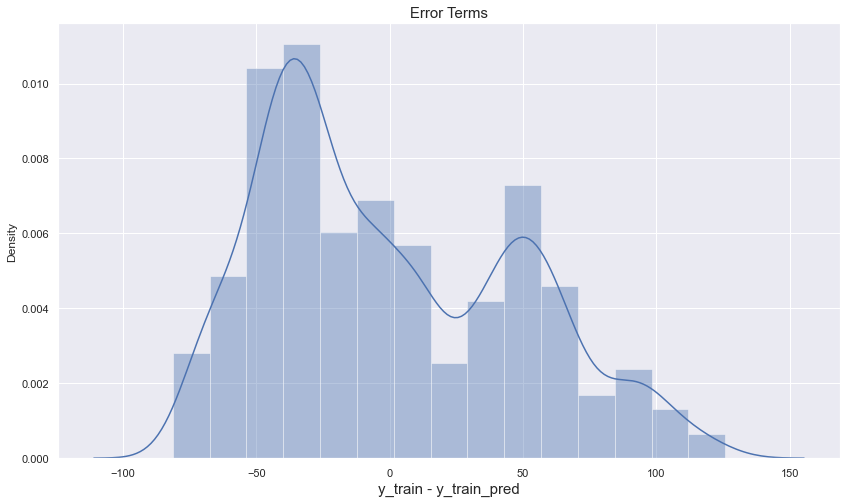

In [121]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

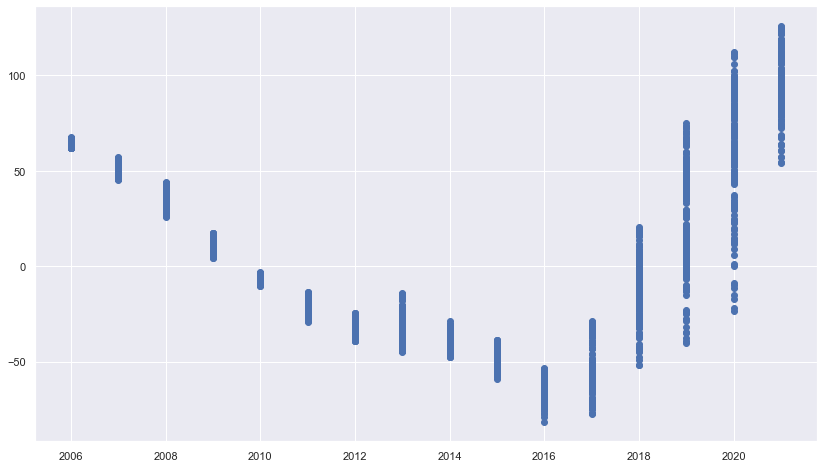

In [122]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [123]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

2424    157.616663
2643    157.616663
2501    157.616663
2044    114.551849
288     -36.174999
           ...    
2219    136.084256
2875    179.149070
531     -14.642592
2844    179.149070
2689    179.149070
Length: 1162, dtype: float64

In [124]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.788061641332769

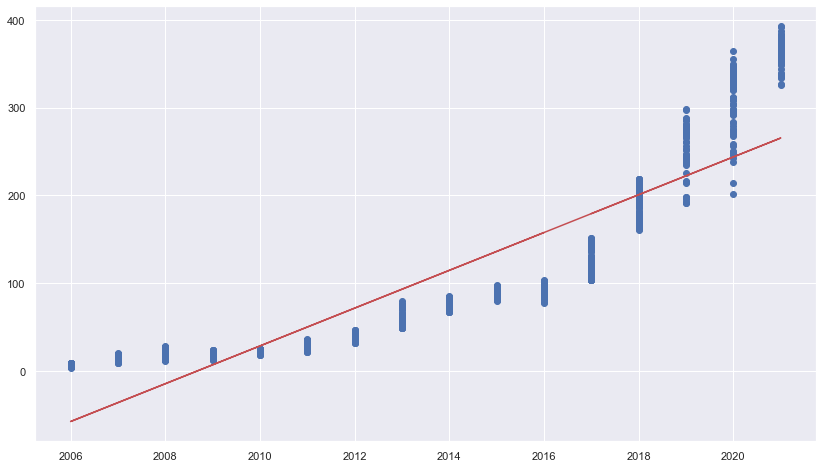

In [125]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

## Summarize Your Work

Take some time to reflect on your linear regression model. Make note of your answers to the following questions.

1. When using a linear regression model to analyze financial data, getting an R-squared value above 0.7 is considered excellent. Was your R-squared value higher than this threshold?
Yes.
2. Based on your analysis, would you recommend that linear regression be used to predict the price of Mastercard shares?
No